##### This notebook is divided into 4 sections, each constituiting a workflow on its own.

#### Part 1: Data Understanding and Data Cleaning

#### Part 2: Exploratory Data Analysis

#### Part 3: Data Preprocessing

#### Part 4: Machine Learning Methodology and Model Evaluation

### Setup

### Library import

In [1]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")


## Data Understanding and Data Cleaning

In [2]:
# Importing the dataset and saving into a variable.

phone_df = pd.read_csv("train (1).csv")

phone_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
phone_df.shape

(2000, 21)

In [4]:
# Viewing the data columns

phone_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
# Viewing the number of missing values for each column.

phone_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
# Viewing the number of duplicate records in the dataset

phone_df.duplicated().sum()

0

In [7]:
# Data columns and their data types

phone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
# Viewing the statistical description

phone_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


#### Are they all normally distributed?

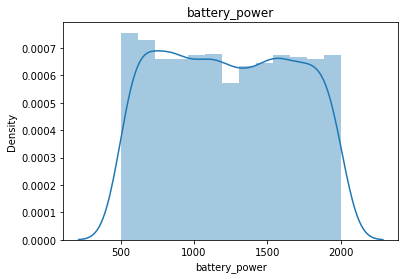

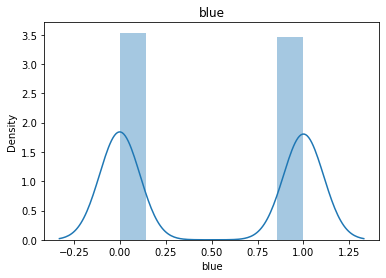

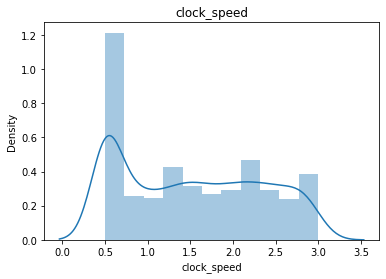

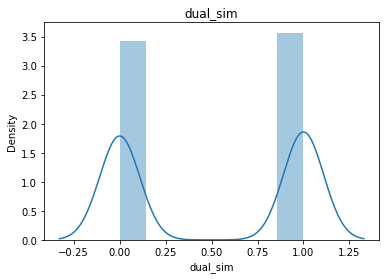

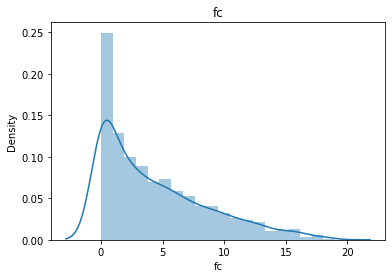

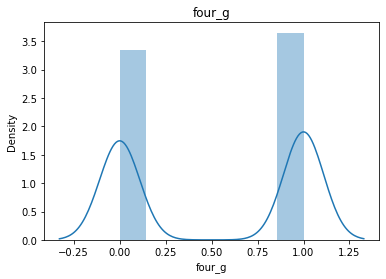

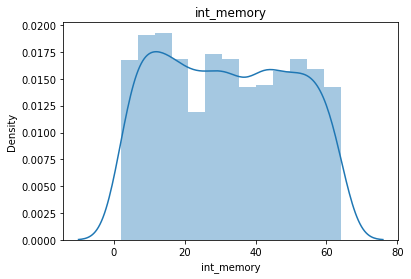

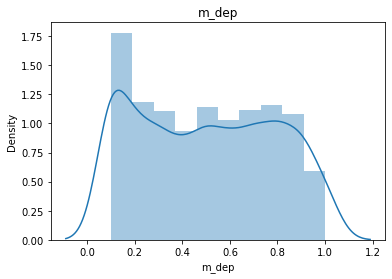

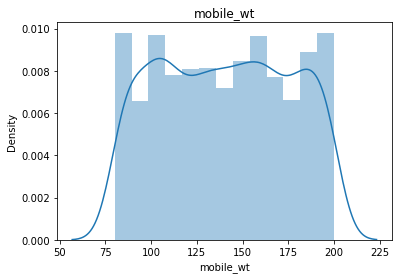

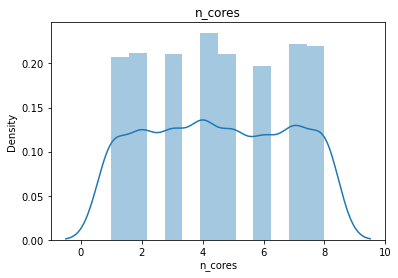

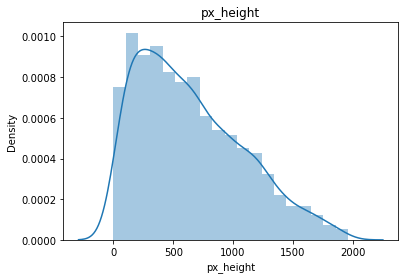

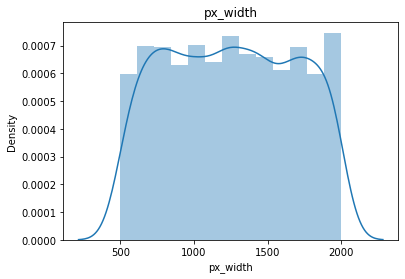

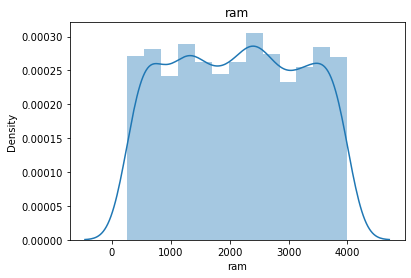

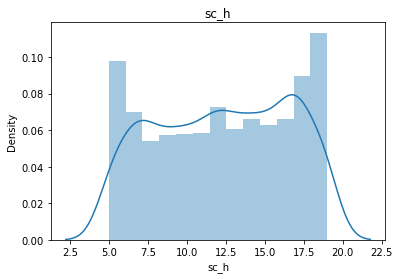

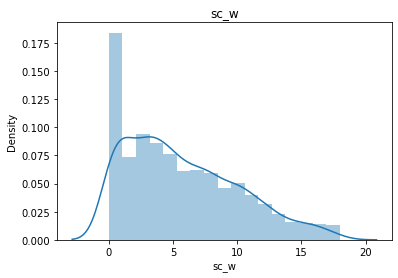

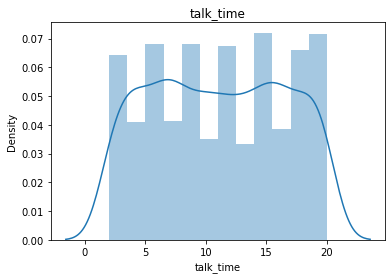

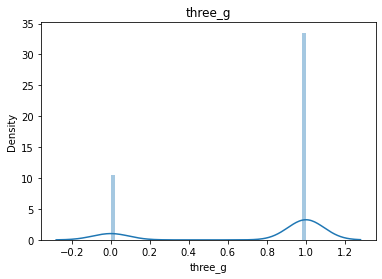

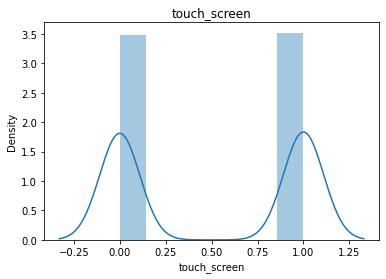

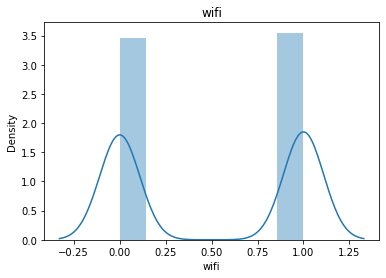

In [9]:
for columns in["battery_power", "blue", "clock_speed","dual_sim", "fc","four_g","int_memory","m_dep",
"mobile_wt","n_cores","px_height","px_width","ram","sc_h","sc_w","talk_time", "three_g","touch_screen","wifi"]:
    sb.distplot(phone_df[columns])
    plt.title(columns)
    plt.show()

The columns Bluetooth, dual simcard, 4g, 3g, touch screen, and wifi are normally distributed. Screen width, Pixel resolution height, and front camera are positively skewed.

#### Detecting outliers

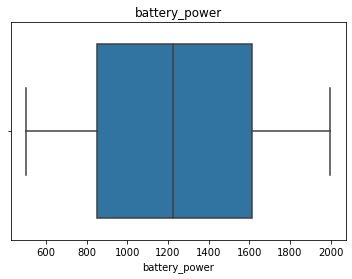

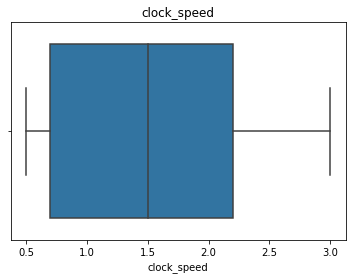

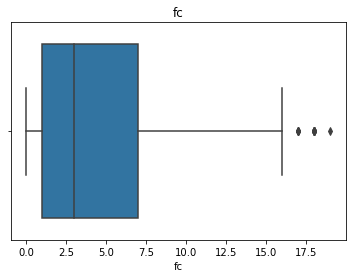

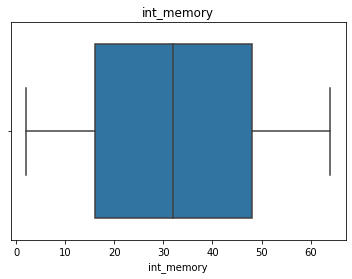

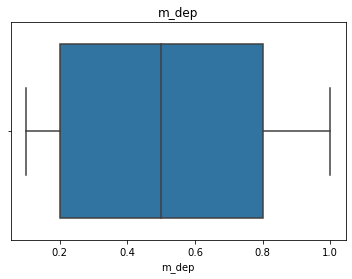

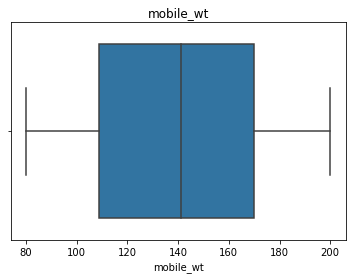

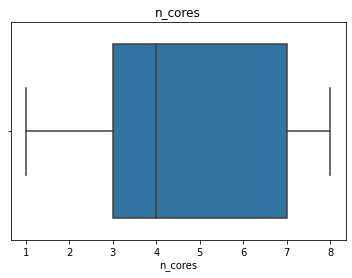

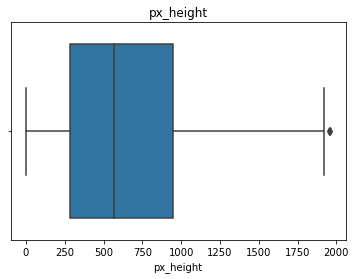

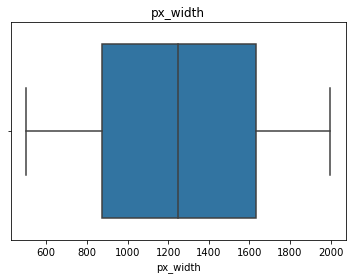

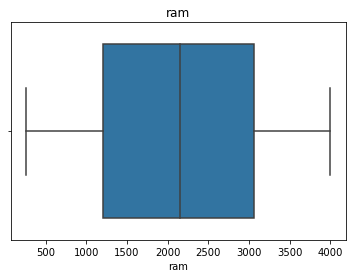

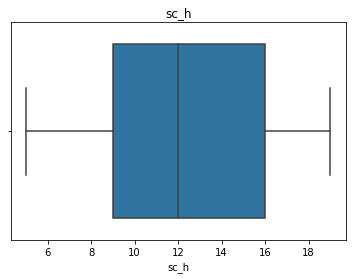

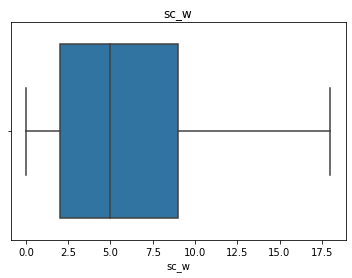

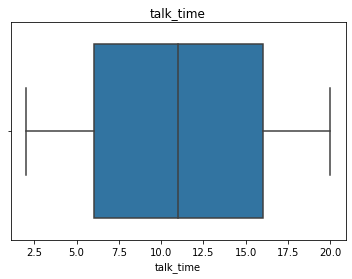

In [10]:
for columns in["battery_power", "clock_speed", "fc","int_memory","m_dep","mobile_wt","n_cores","px_height",
"px_width","ram","sc_h","sc_w","talk_time"]:
    sb.boxplot(phone_df[columns])
    plt.title(columns)
    plt.show()

Front camera and Pixel resolution height columns contain outliers. The outliers are located after the maximum value.

## Exploratory Data Analysis

#### Univariate Analysis

Text(0.5, 1.0, 'count of phones with wifi, Yes = 1, No = 0')

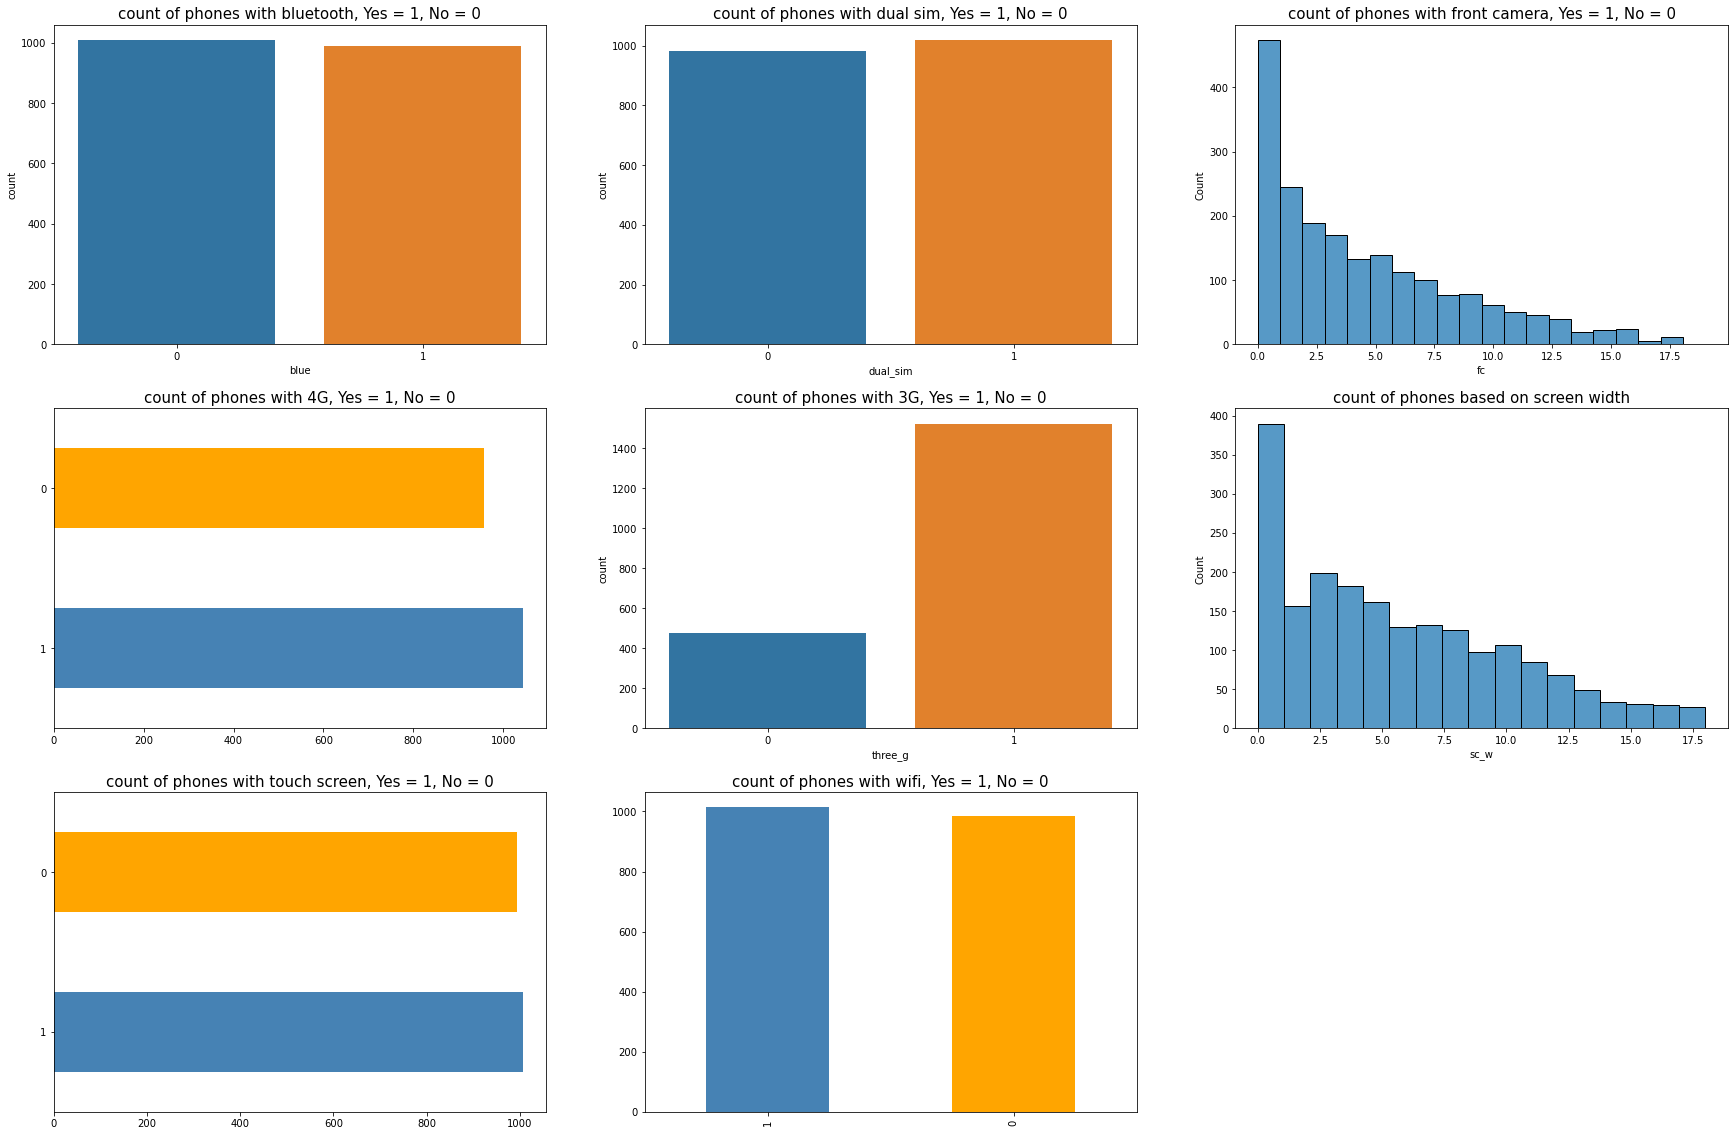

In [11]:
plt.figure(figsize = (30,20))

colors = ["steelblue", "orange"]

plt.subplot (3,3,1)
sb.countplot( data = phone_df, x = phone_df["blue"])
plt.title("count of phones with bluetooth, Yes = 1, No = 0", fontsize = 15)

plt.subplot (3,3,2)
sb.countplot( data = phone_df, x = phone_df["dual_sim"])
plt.title("count of phones with dual sim, Yes = 1, No = 0", fontsize = 15)

plt.subplot (3,3,3)
sb.histplot(phone_df["fc"])
plt.title("count of phones with front camera, Yes = 1, No = 0", fontsize = 15)

plt.subplot(3,3,4)
phone_df["four_g"].value_counts().plot(kind = "barh", color = colors)
plt.title("count of phones with 4G, Yes = 1, No = 0", fontsize = 15)

plt.subplot(3,3,5)
sb.countplot(data = phone_df, x = phone_df["three_g"])
plt.title("count of phones with 3G, Yes = 1, No = 0", fontsize = 15)

plt.subplot(3,3,6)
sb.histplot(phone_df["sc_w"])
plt.title("count of phones based on screen width", fontsize = 15)
         
plt.subplot(3,3,7)
phone_df["touch_screen"].value_counts().plot(kind = "barh", color = colors)
plt.title("count of phones with touch screen, Yes = 1, No = 0", fontsize = 15)

plt.subplot(3,3,8)
phone_df["wifi"].value_counts().plot(kind = "bar", color = colors)
plt.title("count of phones with wifi, Yes = 1, No = 0", fontsize = 15)

#### Bivariate Analysis

Text(0.5, 1.0, 'Count of dual sim cards: 0(No), 1 (Yes) against price range: 0(low cost), 1(medium cost), 2(high cost) 3(very high cost)')

<Figure size 1080x360 with 0 Axes>

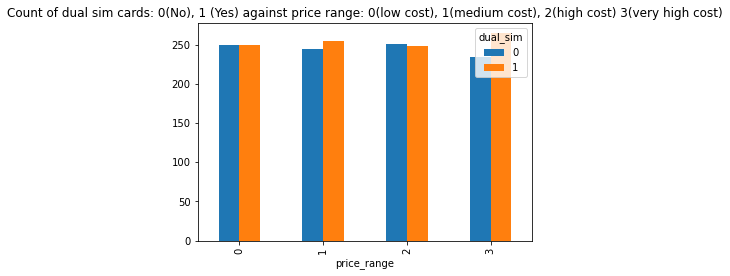

In [12]:
plt.figure(figsize = (15,5))
p = pd.crosstab(phone_df["price_range"], phone_df["dual_sim"])
p.plot(kind = "bar")
plt.title("Count of dual sim cards: 0(No), 1 (Yes) against price range: 0(low cost), 1(medium cost), 2(high cost) 3(very high cost)")

For medium and expensive phone cost, they have more of dual sim phones than single sims.

Text(0.5, 1.0, 'Count of dual 4G: 0(No), 1 (Yes) against price range: 0(low cost), 1(medium cost), 2(high cost) 3(very high cost)')

<Figure size 1080x360 with 0 Axes>

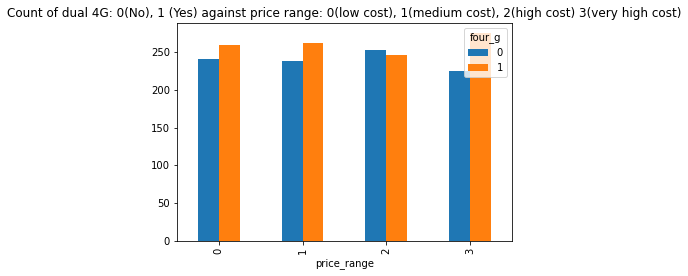

In [13]:
plt.figure(figsize = (15,5))
p = pd.crosstab(phone_df["price_range"], phone_df["four_g"])
p.plot(kind = "bar")
plt.title("Count of dual 4G: 0(No), 1 (Yes) against price range: 0(low cost), 1(medium cost), 2(high cost) 3(very high cost)")

For phones with very high cost, they have more of 4g network than other phone cost.

Text(0.5, 1.0, 'Count of bluetooth: 0(No), 1 (Yes) against price range: 0(low cost), 1(medium cost), 2(high cost) 3(very high cost)')

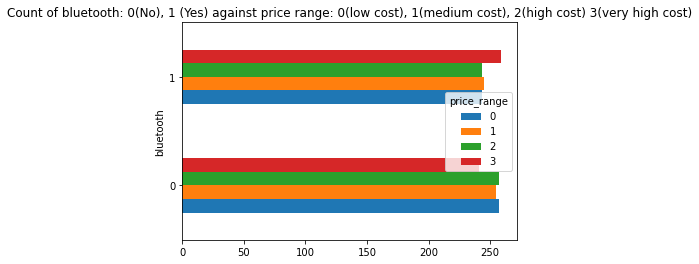

In [14]:
bl = pd.crosstab(phone_df["blue"], phone_df["price_range"])
bl.plot(kind = "barh", xlabel = "bluetooth")
plt.title("Count of bluetooth: 0(No), 1 (Yes) against price range: 0(low cost), 1(medium cost), 2(high cost) 3(very high cost)")

Phones with bluetooth have very high cost than those without bluetooth.

Text(0.5, 1.0, 'Count of wifi: 0(No), 1 (Yes) against price range: 0(low cost), 1(medium cost), 2(high cost) 3(very high cost)')

<Figure size 1080x360 with 0 Axes>

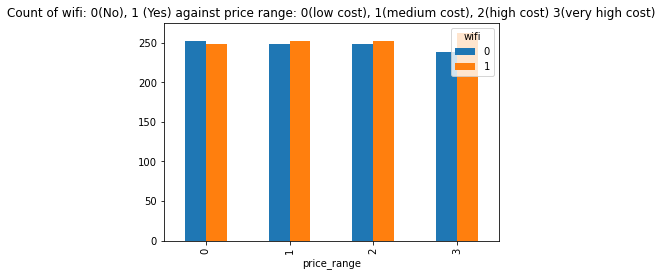

In [15]:
plt.figure(figsize = (15,5))
p = pd.crosstab(phone_df["price_range"], phone_df["wifi"])
p.plot(kind = "bar")
plt.title("Count of wifi: 0(No), 1 (Yes) against price range: 0(low cost), 1(medium cost), 2(high cost) 3(very high cost)")

The very high cost phones have greater number of wifi.

Text(0.5, 1.0, 'Count of touch screens: 0(No), 1 (Yes) against price range: 0(low cost), 1(medium cost), 2(high cost) 3(very high cost)')

<Figure size 1080x360 with 0 Axes>

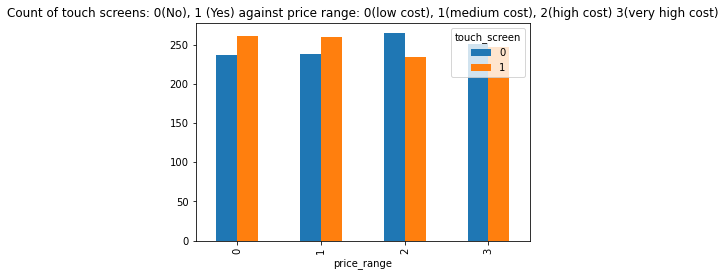

In [16]:
plt.figure(figsize = (15,5))
p = pd.crosstab(phone_df["price_range"], phone_df["touch_screen"])
p.plot(kind = "bar")
plt.title("Count of touch screens: 0(No), 1 (Yes) against price range: 0(low cost), 1(medium cost), 2(high cost) 3(very high cost)")

The phones wih greater number of touch screen availability falls within low cost and medium cost.
Those with high cost are not dependent on screen.

#### Multivariate Analysis

<AxesSubplot:>

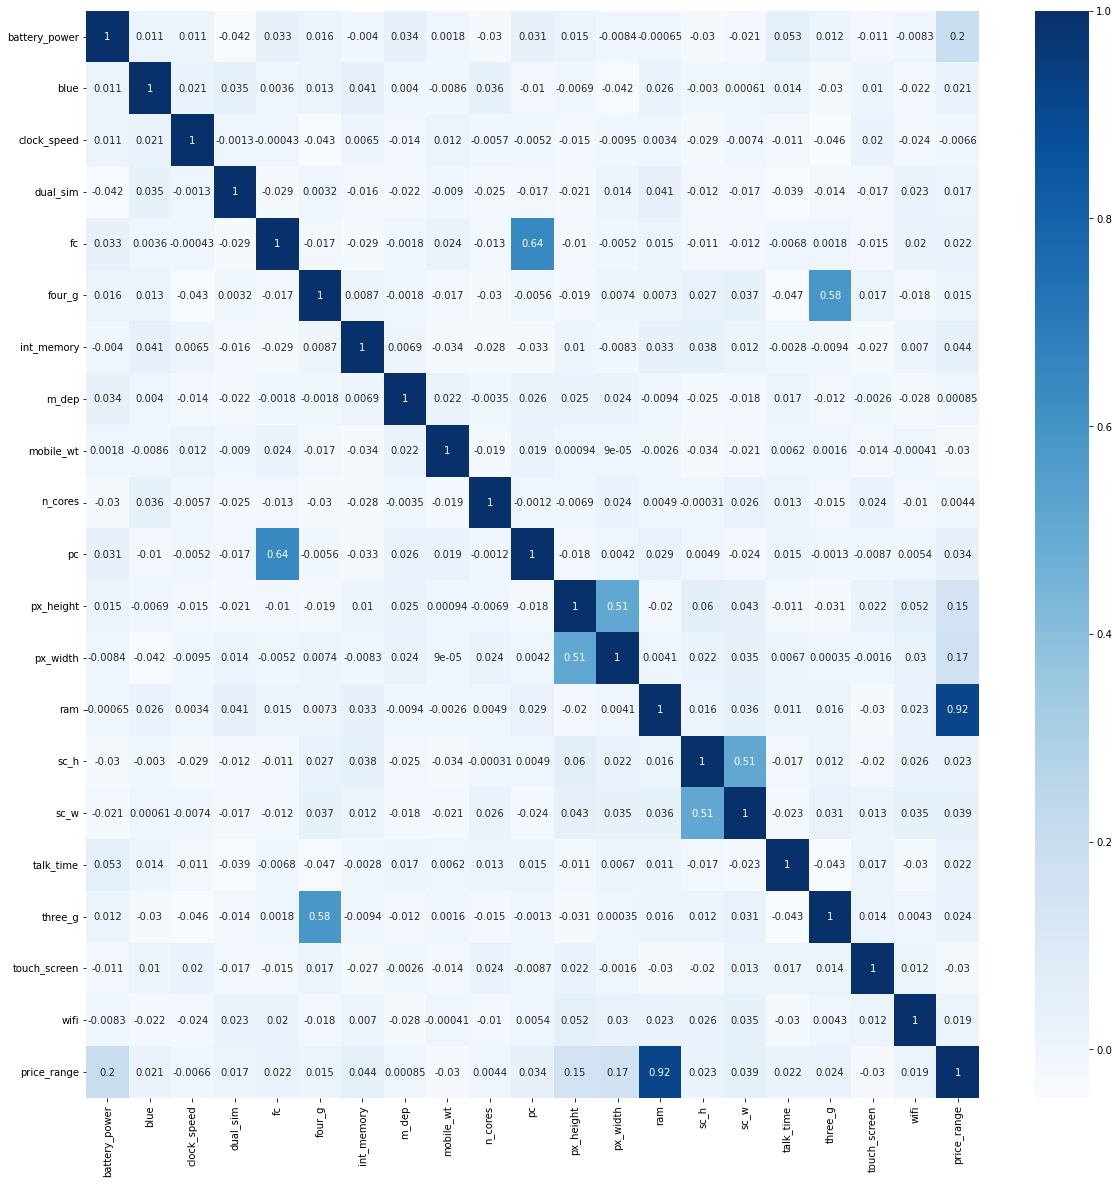

In [17]:
plt.figure(figsize = (20,20))
sb.heatmap(phone_df.corr(), cmap = "Blues", annot = True)

The random acess memory (RAM) has a greater correlation with price range than others at 0.92. The correlation is a positive relationship

## Data Preprocessing

In [18]:
phone_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [19]:
# Splitting the train dataset columns into independent variables and dependent variable respectively.

X_train = phone_df.drop(["price_range"], axis = 1)
Y_train = phone_df["price_range"]

In [20]:
print(Y_train)

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64


In [21]:
# Standardizing independent variable of train dataset to ensure normalizationamong values. 
#i.e no bigger numbers takes precedence ovcer smaller figures during model training

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_train

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [22]:
# Importing the test dataset 

X_test = pd.read_csv("test (1).csv")
X_test.head(5)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [23]:
# Viewing the number of duplicate records in the dataset

X_test.duplicated().sum()

0

In [24]:
# Viewing the number of missing values for each column.

X_test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [25]:
# Data columns and their data types

X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [26]:
# dropping an unwanted column

X_test.drop(["id"], axis = 1, inplace = True)

In [27]:
# Standardizing independent variable of test dataset to ensure normalizationamong values. 
#i.e no bigger numbers takes precedence ovcer smaller figures during model training

X_test = sc.fit_transform(X_test)
X_test

array([[-0.47545131,  0.968496  ,  0.31260069, ..., -1.76021608,
         1.        , -1.01409939],
       [-0.94278218,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 1.29207729,  0.968496  ,  1.51908734, ..., -1.76021608,
         1.        ,  0.98609664],
       ...,
       [-0.1469316 , -1.03252879, -0.16999397, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 0.65817305,  0.968496  , -1.25583195, ..., -1.76021608,
         1.        , -1.01409939],
       [ 0.04971753,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        ,  0.98609664]])

## Model Methodology

#### Decision Tree

In [28]:
# Importing model of choice
from sklearn.tree import DecisionTreeClassifier

# Importing function for model performance calculation
from sklearn.metrics import classification_report, confusion_matrix

#creating variable from model
Dtc = DecisionTreeClassifier()

# fitting our training data into the model
dc_model = Dtc.fit(X_train, Y_train)

In [29]:
# defining a variable for predicted values
dy_pred = dc_model.predict(X_test)

# viewing the predicted values
dy_pred

array([3, 3, 3, 3, 1, 3, 3, 1, 3, 0, 3, 3, 1, 0, 2, 1, 2, 0, 3, 2, 0, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 1, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 0, 3, 3, 2, 0, 2, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 1, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 1, 0, 2, 0, 3, 1, 0, 0, 3, 1, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 2, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 3, 2, 2, 0, 2,
       1, 1, 3, 0, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 2, 2, 3, 3, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 2, 0, 0, 2,
       1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 3, 3, 3, 2, 2, 0, 0, 0, 1, 2, 0, 2, 3, 3, 1, 2, 0, 3,
       2, 3, 3, 0, 0, 1, 1, 3, 0, 1, 0, 2, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 2, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 0, 2, 2, 1, 2,
       3, 3, 3, 1, 1, 1, 2, 2, 2, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 3, 1, 3, 3, 2, 3, 2, 2, 1, 2, 0, 2, 3, 1,

#### Random Forest Classifier

In [30]:
# Importing model of choice
from sklearn.ensemble import RandomForestClassifier

# Saving model choice as a variable
Rfc = RandomForestClassifier()

# Fiting the training data into the model
r_model = Rfc.fit(X_train, Y_train)

In [31]:
# defining a variable for predicted values
ry_pred = r_model.predict(X_test)

# viewing the predicted values
ry_pred

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 2, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 0, 0, 3, 1, 2, 1, 0, 2, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 2, 1, 1,
       1, 2, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       2, 0, 1, 2, 2, 0, 2, 1, 0, 2, 1, 3, 1, 0, 0, 3, 1, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 1, 0, 3, 2, 3, 1, 0, 2,
       2, 1, 3, 1, 2, 0, 3, 2, 1, 3, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 0, 0,
       2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 2, 3, 3, 2, 2, 0, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 2, 3, 0, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 1, 3, 1, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 1, 0, 2, 3, 1,

#### Support Vector Machine

In [32]:
# Importing model of choice
from sklearn.svm import SVC

# Saving model choice as a variable
s = SVC()

# fitting our training data into the model
s_model = s.fit(X_train, Y_train)

In [33]:
# defining a variable for predicted values
sy_pred = s_model.predict(X_test)

# viewing the predicted values
sy_pred

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 1, 1, 3,
       1, 1, 3, 0, 2, 0, 2, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 2, 0, 3, 1, 3, 1, 0, 3, 3, 2, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 2, 1,
       3, 0, 1, 1, 2, 1, 2, 1, 0, 2, 1, 3, 1, 0, 0, 3, 0, 2, 1, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 2, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 1, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 3, 3, 2, 2, 2, 1, 0, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 2, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 1, 2, 0, 3, 1, 2, 0,
       0, 2, 1, 2, 2, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1,

#### Logistic Regression Model

In [34]:
from sklearn.linear_model import LogisticRegression

# Saving model choice as a variable
lr = LogisticRegression()

# fitting our training data into the model
lr_model = lr.fit(X_train , Y_train)

In [35]:
# defining a variable for predicted values
ly_pred = lr_model.predict(X_test)

# viewing the predicted values
ly_pred

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 2, 2, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 3, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

## Model Evaluation

#### Decision Tree 

In [36]:
# To check model performance through cross-validation

# Importing Cross validation score
from sklearn.model_selection import cross_val_score, cross_val_predict

# Importing KFold
from sklearn.model_selection import KFold

# Importing StratifiedKFold
from sklearn.model_selection import StratifiedKFold

# Identifying number of splits and saving it as a variable
kf = KFold(n_splits = 10)

# Evaluating the model
dtc_result =  cross_val_score (DecisionTreeClassifier(),X_train, Y_train, cv = kf)

In [37]:
 print(dtc_result)

[0.815 0.84  0.845 0.825 0.835 0.86  0.845 0.79  0.85  0.79 ]


In [38]:
# Checking the accuracy of the splits
print("Mean Accuracy is ", dtc_result.mean())

Mean Accuracy is  0.8294999999999998


In [39]:
dtc_pred = cross_val_predict(DecisionTreeClassifier(), X_train, Y_train, cv = kf)
print(dtc_pred)

[1 2 2 ... 3 0 3]


#### Random Forest

In [40]:
# To check model performance through cross-validation

# Importing Cross validation score
from sklearn.model_selection import cross_val_score

# Importing KFold
from sklearn.model_selection import KFold

# Importing StratifiedKFold
from sklearn.model_selection import StratifiedKFold

# Identifying number of splits and saving it as a variable
kf = KFold(n_splits = 10)

# Evaluating the model
rfc_result =  cross_val_score (RandomForestClassifier(), X_train, Y_train, cv = kf)

In [41]:
print(rfc_result)

[0.885 0.865 0.9   0.87  0.89  0.895 0.895 0.87  0.87  0.865]


In [42]:
# Checking the accuracy of the splits
print("Mean Accuracy is ", rfc_result.mean())

Mean Accuracy is  0.8805


In [43]:
rfc_pred = cross_val_predict(RandomForestClassifier(), X_train, Y_train, cv = kf)
print(rfc_pred)

[2 2 2 ... 3 0 3]


#### Support Vector Machine

In [44]:
# To check model performance through cross-validation

# Importing Cross validation score
from sklearn.model_selection import cross_val_score

# Importing KFold
from sklearn.model_selection import KFold

# Importing StratifiedKFold
from sklearn.model_selection import StratifiedKFold

# Identifying number of splits and saving it as a variable
kf = KFold(n_splits = 10)

# Evaluating the model
svm_result =  cross_val_score (SVC(), X_train, Y_train, cv = kf)

In [45]:
print(svm_result)

[0.895 0.9   0.86  0.875 0.925 0.885 0.88  0.855 0.885 0.87 ]


In [46]:
# Checking the accuracy of the splits
print("Mean Accuracy is ", svm_result.mean())

Mean Accuracy is  0.8829999999999998


In [47]:
svm_pred = cross_val_predict(SVC(), X_train, Y_train, cv = kf)
print(svm_pred)

[1 3 2 ... 3 0 3]


#### Logistic Regression

In [48]:
# To check model performance through cross-validation

# Importing Cross validation score
from sklearn.model_selection import cross_val_score

# Importing KFold
from sklearn.model_selection import KFold

# Importing StratifiedKFold
from sklearn.model_selection import StratifiedKFold

# Identifying number of splits and saving it as a variable
kf = KFold(n_splits = 10)

# Evaluating the model
lr_result =  cross_val_score (LogisticRegression(), X_train, Y_train, cv = kf)

In [49]:
print(lr_result)

[0.955 0.98  0.955 0.95  0.97  0.96  0.96  0.96  0.97  0.96 ]


In [50]:
# Checking the accuracy of the splits

print("Mean Accuracy is ", lr_result.mean())

Mean Accuracy is  0.9620000000000001


In [51]:
lr_pred = cross_val_predict(LogisticRegression(), X_train, Y_train, cv = kf)
print(lr_pred)

[1 2 2 ... 3 0 3]


#### The Accuracy of the model using Logistic Regression is 96%. Therefore, we will stick with Logistic Regression  in our price prediction.

In [52]:
# Import confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

# Calculating confusion matrix and naming it as a variable
cm = confusion_matrix(Y_train, lr_pred)
cm

array([[490,  10,   0,   0],
       [ 15, 474,  11,   0],
       [  0,  16, 470,  14],
       [  0,   0,  10, 490]])

 The array is arrange in 0 1 2 3, from low to very high cost for the price range.

<AxesSubplot:>

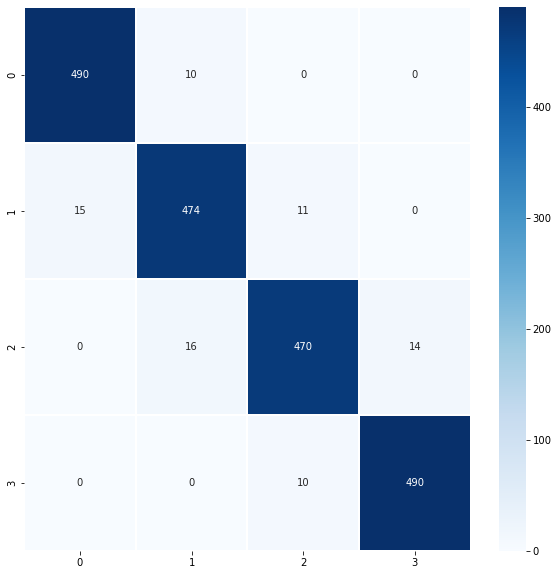

In [53]:
# Plotting an heatmap for the four classes of price_range.

plt.figure(figsize = (10,10))
sb.heatmap(cm, cmap = "Blues", annot = True, fmt = "d", linewidths = 1.5)

0 : low cost, 1 : medium cost, 2: high cost, 3: very high cost

In [54]:
# printing classification report of logistics regression

print(classification_report(Y_train, lr_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       500
           1       0.95      0.95      0.95       500
           2       0.96      0.94      0.95       500
           3       0.97      0.98      0.98       500

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000

